# **MÓDULO 15 - Exercício**
# Análise  - A segunda etapa da Pré Modelagem

# 1) O primeiro exercício é o de salvar a base que criaram na atividade do módulo anterior em csv e abrir ela neste arquivo.
Igual fizemos no início do módulo atual no início da primeira aula.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
#Seu código de importação aqui
df = pd.read_csv("C:/Users/juhan/OneDrive/Área de Trabalho/dev/Ciência de dados EBAC/Modulo 14/Atividade/CHURN_CREDIT_MOD14_PART2.1.csv")


#df['Churn'].value_counts()
df['Churn'] = df['Churn'].fillna(df['Churn'].mode()[0])
Churn_Moda = df['Churn_cod'].mode()
#df['Churn_cod'] = df['Churn_cod'].fillna(Churn_Moda)
#df['Churn'].isna().sum()
cols = ['Churn_cod']
df[cols] = df[cols].replace(-1, 0)
df.head(10).round(2)

,Idoso,Casado,Dependentes,Tempo_como_Cliente,Servico_Telefonico,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,Metodo_Pagamento,Pagamento_Mensal,Total_Pago,Churn,Dependentes_cod,Casado_cod,Servico_Telefonico_cod,Churn_cod
0,0,YES,NO,1,NO,DSL,NO,NO,NO,MONTH-TO-MONTH,Electronic check,29.85,29.85,No,0,1,0,0
1,0,NO,NO,34,YES,DSL,YES,NO,NO,ONE YEAR,Mailed check,56.95,1889.50,No,0,0,1,0
2,0,NO,NO,2,YES,DSL,YES,NO,NO,MONTH-TO-MONTH,Mailed check,53.85,108.15,Yes,0,0,1,1
3,0,NO,NO,45,NO,DSL,YES,YES,NO,ONE YEAR,Bank transfer (automatic),65.61,1840.75,No,0,0,0,0
4,0,NO,NO,2,YES,FIBER OPTIC,NO,NO,NO,MONTH-TO-MONTH,Electronic check,65.61,151.65,Yes,0,0,1,1
5,0,NO,NO,8,YES,FIBER OPTIC,NO,NO,YES,MONTH-TO-MONTH,Electronic check,65.61,820.50,No,0,0,1,0
6,0,NO,YES,22,YES,FIBER OPTIC,NO,NO,YES,MONTH-TO-MONTH,Credit card (automatic),65.61,1949.40,No,1,0,1,0
7,0,NO,NO,10,NO,DSL,YES,NO,NO,MONTH-TO-MONTH,Mailed check,65.61,301.90,No,0,0,0,0
8,0,YES,NO,28,YES,FIBER OPTIC,NO,YES,YES,MONTH-TO-MONTH,Electronic check,65.61,3046.05,No,0,1,1,0
9,0,NO,YES,62,YES,DSL,YES,NO,NO,ONE YEAR,Bank transfer (automatic),65.61,3487.95,No,1,0,1,0


# 2) Comece pela análise univariada:

A) Utilize a função describe no seu dataframe, veja os insights que consegue retirar.

B) Já é possível identificar variáveis com possíveis outliers? Se sim, quais?

C) Plot gráficos que considerar importante para completar sua análise univariada. (Lembrando que sua variável preditora é o churn). Não se esqueça de trazer insights de cada gráfico plotado. Utilize pelo menos 4 variáveis distintas.

D) Verifique se os dados das variáveis Booleanas são balanceados ou não.

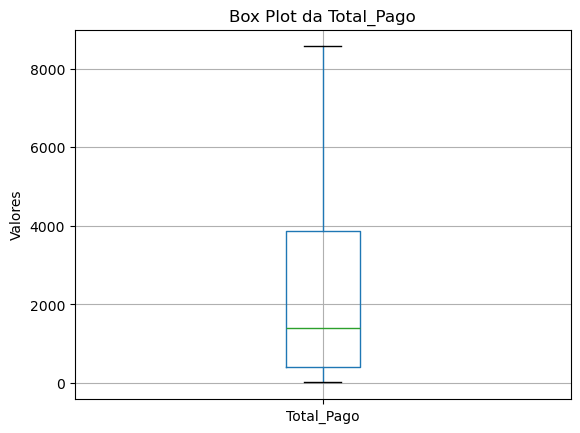

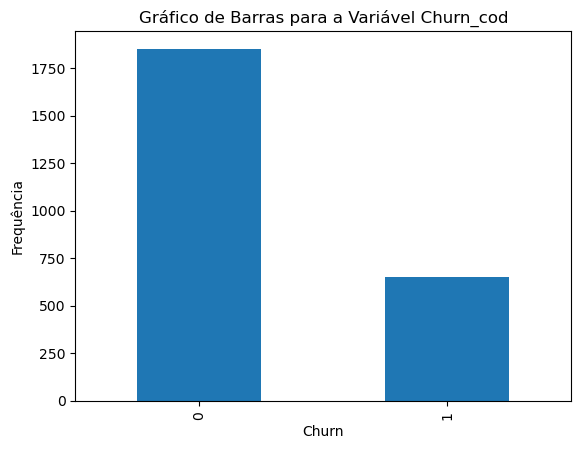

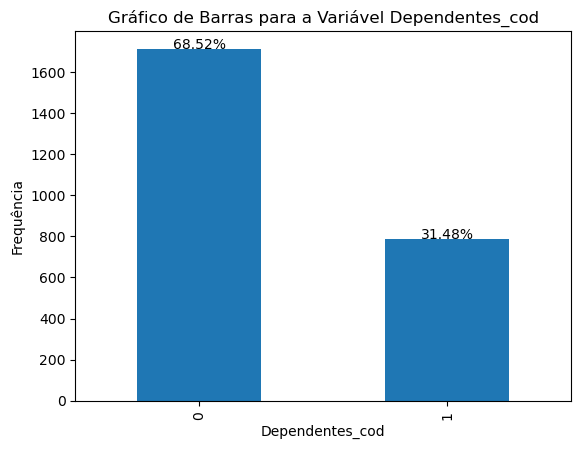

In [3]:
#Seu código aqui


# A) Terei que padronizar as casas decimais, sinto que os dados ainda estão confusos. Pelo que entendi o pagamento mensal tem como media de preço 65 reais
# e o desvio padrão é de 27 reais, o tempo como cliente parece ser de 32 meses a media, o desvio padrão e o total pago estão com valores similares (dados espalhados)
df.describe().round(2)
# B) Eu diria que Total_pago me parece seruma variavel que tem outliers
#C)
df.boxplot(column='Total_Pago')
plt.title('Box Plot da Total_Pago')
plt.ylabel('Valores')
plt.show()
# Contagem dos valores da coluna de Churn_cod
contagem_Churn = df['Churn_cod'].value_counts()

# Calculando a porcentagem para que apareça no gráfico
porcentagem_Churn = (contagem_Churn / contagem_Churn.sum()) * 100
ax = contagem_Churn.plot(kind='bar')
plt.title('Gráfico de Barras para a Variável Churn_cod')
plt.xlabel('Churn')
plt.ylabel('Frequência')
plt.show()


contagem = df['Dependentes_cod'].value_counts()
porcentagem = (contagem / contagem.sum()) * 100

ax = contagem.plot(kind='bar')

for i, v in enumerate(contagem):
    ax.text(i, v + 1, f'{porcentagem[i]:.2f}%', ha='center')
plt.title('Gráfico de Barras para a Variável Dependentes_cod')
plt.xlabel('Dependentes_cod')
plt.ylabel('Frequência')

plt.show()


# 3) Identifique e trate as colunas que contém outliers.
Caso opte por mante-los ou altera-los justifique sua escolha.


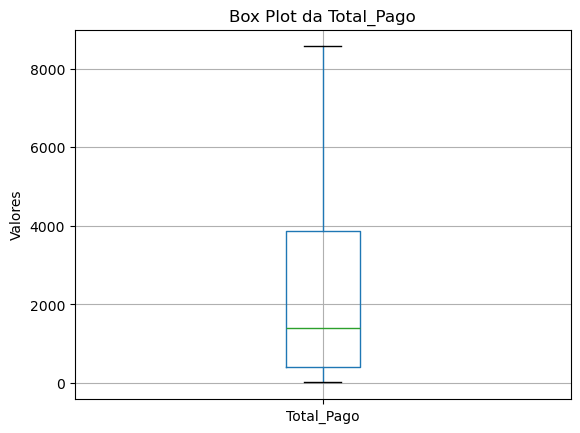

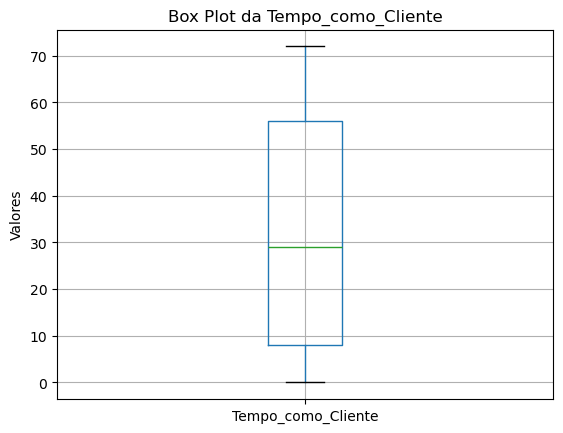

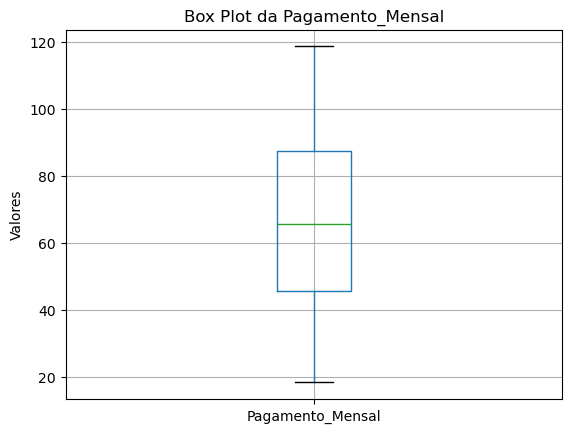

In [4]:
#Seu código aqui


df.boxplot(column='Total_Pago')
plt.title('Box Plot da Total_Pago')
plt.ylabel('Valores')
plt.show()

df.boxplot(column='Tempo_como_Cliente')
plt.title('Box Plot da Tempo_como_Cliente')
plt.ylabel('Valores')
plt.show()

df.boxplot(column='Pagamento_Mensal')
plt.title('Box Plot da Pagamento_Mensal')
plt.ylabel('Valores')
plt.show()

#df[df['Total_Pago'] > 7000]
#df[df['Tempo_como_Cliente'] > 50]
#df[df['Pagamento_Mensal'] > 65]

#Essas são as colunas que pensei em tratar, mas pelo que notei nos gráficos há valores expressivos, mas a correlação entre tempo como cliente e os serviços assinados faz sentido com os valores, portanto não irei mexer nas mesmas.

# 4) Realize a etapa da análise bivariada:
A) Questione pelo menos 5 informações e traga as respostas utilizando visuais gráficos e insights.


B) Quais variáveis você acredita serem as mais importantes para esse projetos relacionadas a variável Churn?

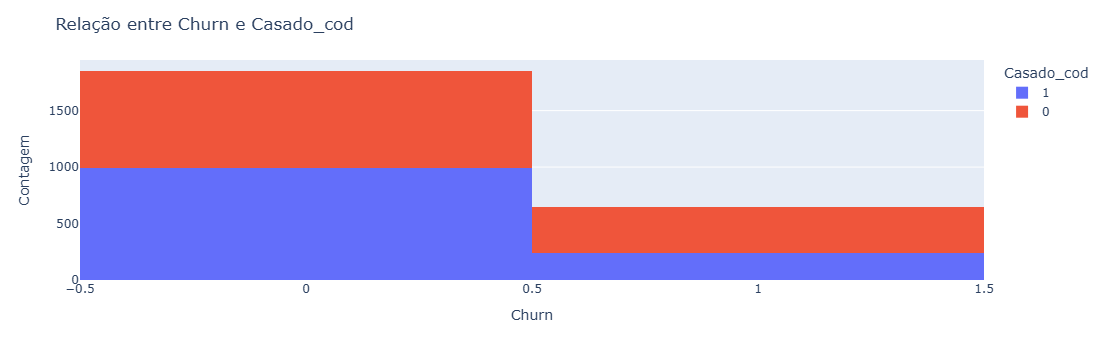

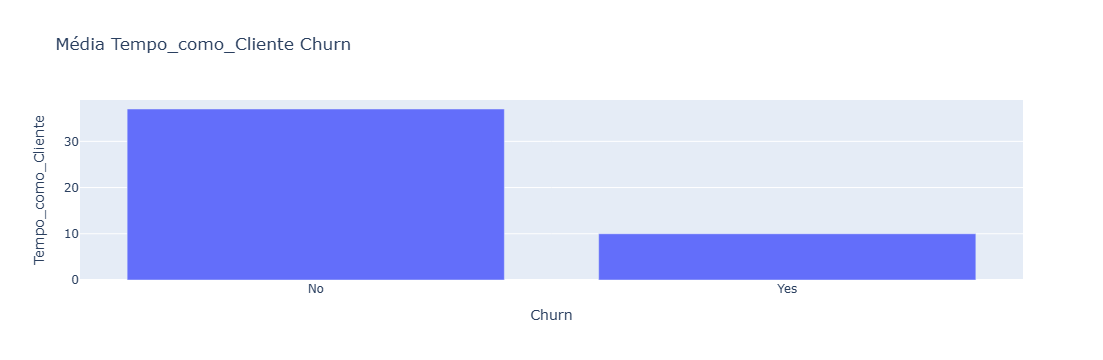

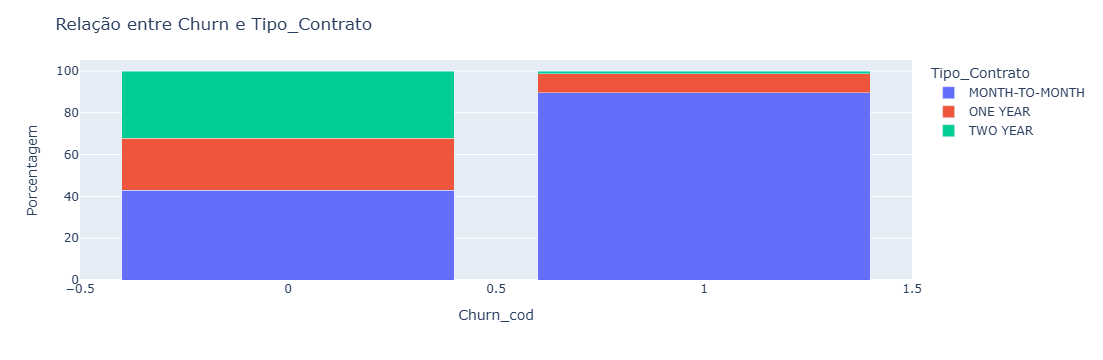

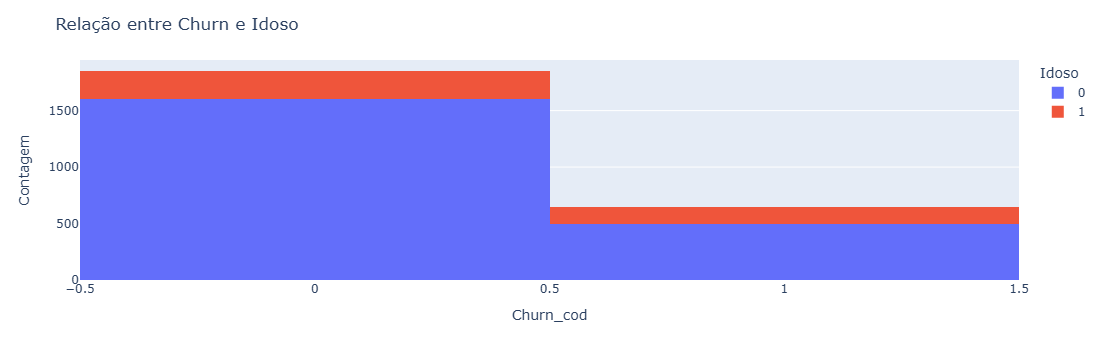

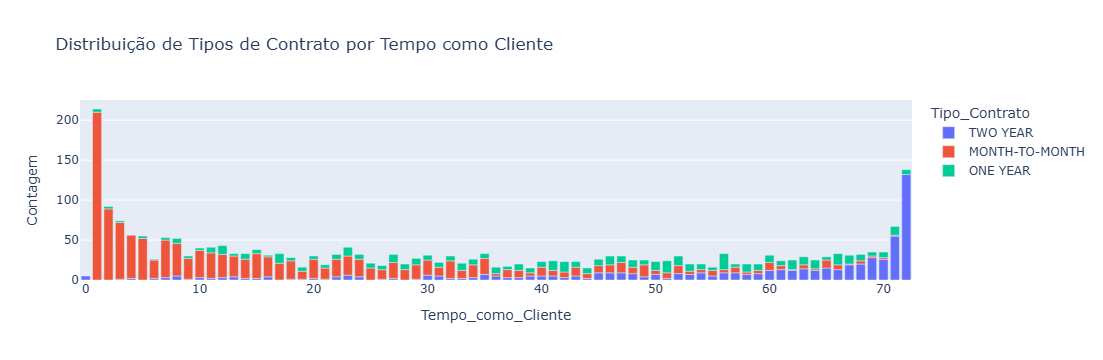

In [11]:
#Seu código aqui
#A) 

fig = px.histogram(df, x='Churn_cod', color='Casado_cod', barmode='stack')

# Layout
fig.update_layout(title='Relação entre Churn e Casado_cod',
                  xaxis_title='Churn',
                  yaxis_title='Contagem',
                  legend_title='Casado_cod')
fig.show()



mediana = df.groupby('Churn')['Tempo_como_Cliente'].median().reset_index()

# Criar gráfico de barras
fig = px.bar(mediana, x='Churn', y='Tempo_como_Cliente',
             title='Média Tempo como Cliente Churn')
fig.show()


# Calcular a porcentagem de cada categoria
df_grouped = df.groupby(['Churn_cod', 'Tipo_Contrato']).size().reset_index(name='count')
total_por_churn = df_grouped.groupby('Churn_cod')['count'].transform('sum')
df_grouped['percent'] = (df_grouped['count'] / total_por_churn) * 100

# Cria gráfico de barras empilhadas
fig = px.bar(df_grouped, x='Churn_cod', y='percent', color='Tipo_Contrato', barmode='stack',
             labels={'Churn_cod': 'Churn_cod', 'percent': 'Porcentagem', 'Tipo_Contrato': 'Tipo_Contrato'})

fig.update_layout(title='Relação entre Churn e Tipo_Contrato',
                  yaxis_title='Porcentagem',
                  legend_title='Tipo_Contrato')
fig.show()



fig = px.histogram(df, x='Churn_cod', color='Idoso', barmode='stack')
fig.update_layout(title='Relação entre Churn e Idoso',
                  xaxis_title='Churn_cod',
                  yaxis_title='Contagem',
                  legend_title='Idoso')
fig.show()

proporcao_contratos = df.groupby(['Tempo_como_Cliente', 'Tipo_Contrato']).size().reset_index(name='Contagem')

fig = px.bar(proporcao_contratos, x='Tempo_como_Cliente', y='Contagem', color='Tipo_Contrato',
             title='Distribuição de Tipos de Contrato por Tempo como Cliente')

fig.show()


#1) Relação entre Churn e Casado - Podemos notar que quem é casado tende a não ser churn e quem não é casado geralmente pode ir ao churn.
# Ponderando um pouco sobre, isso pode ser por questão de estabilidade, tanto financeira quanto em outras areas, solterios tem mais tendência a mudanças.

#2) Média Tempo como Cliente e Churn - De acordo com o gráfico, até o mês 10, o cliente está propenso ao churn, talvez uma ação no primeiro ano seja cabivel
#3) Relação Churn e Contrato - Esse gráfico condiz com o anterior, o Churn é altissimo para clientes de tipo de contrato "Mês a Mês", a partir de 1 ano de contrato essa porcentagem cai.
# Alguma ação onde após alguns meses de uso o 1 ano de contrato tenha um desconto, pode ser uma alternativa.
#4) Os idosos não são maioria e pela própria contagem percebo que tendem a permanecer com o contrato.
#5) Distribuição tipos de contrato e tempo como cliente - O contrato mensal é disparado o mais utilizado e ele é recorrente até clientes que estão com a marca a 49 meses
# Isso indica um certo receio dos clientes com essa marca, geralmente quem fica de mês a mês quer evitar fidelidade ou teve algum percalso, mas como estamos analisando o churn diria que é receio da marca
# Seria importante fazer uma pesquisa do por que esse receio com algum csat antes de uma ação para mudar o cenário.

In [6]:
#B) Tipo de contrato; Casado; Tempo como cliente; Pagamento mensal